In [11]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue
import random
import matplotlib.patches as mpatches

# Generate a random grid of size 10 x 10
grid = np.random.randint(0, 10, size=(10, 10))
print(grid)

[[9 3 9 4 5 6 3 7 8 8]
 [4 7 9 3 3 5 2 2 1 2]
 [7 9 3 4 5 8 8 4 2 6]
 [5 4 1 1 0 5 5 6 0 2]
 [2 5 9 9 6 0 9 9 4 5]
 [7 2 2 7 7 0 9 8 4 9]
 [6 2 9 3 4 6 7 4 5 4]
 [7 5 5 2 5 0 1 5 4 0]
 [9 1 8 1 6 8 9 0 0 0]
 [4 6 3 8 5 2 6 7 3 6]]


In [12]:
def heuristic(grid, show_plot=False):
    # Create an empty array to store the smaller values
    smaller_values = []

    # Get the number of rows and columns in the grid
    num_rows, num_cols = grid.shape

    # Set the current position to the top left corner of the grid
    current_row = 0
    current_col = 0

    # Keep track of the path
    path = [(current_row, current_col)]

    # Keep looping until you reach the bottom right corner of the grid
    while current_row != num_rows - 1 or current_col != num_cols - 1:
        # Get the current value
        current_value = grid[current_row, current_col]

        # Check if we are at the right edge of the grid
        if current_col == num_cols - 1:
            # Go down
            current_row += 1
            smaller_values.append(grid[current_row, current_col])
            path.append((current_row, current_col))
            continue

        # Check if we are at the bottom edge of the grid
        if current_row == num_rows - 1:
            # Go right
            current_col += 1
            smaller_values.append(grid[current_row, current_col])
            path.append((current_row, current_col))
            continue

        # Get the value to the right of the current value
        right_value = grid[current_row, current_col + 1]

        # Get the value below the current value
        below_value = grid[current_row + 1, current_col]

        # Compare the right value and the below value
        if right_value < below_value:
            # Add the right value to the smaller_values array
            smaller_values.append(right_value)
            # Set the current position to the right of the current position
            current_col += 1
            path.append((current_row, current_col))
        else:
            # Add the below value to the smaller_values array
            smaller_values.append(below_value)
            # Set the current position to below the current position
            current_row += 1
            path.append((current_row, current_col))

    # Convert the path to a NumPy array
    path = np.array(path)

    # Calculate the total of the smaller values
    total = np.sum(smaller_values)
    
    if show_plot:
        # Display the grid using Matplotlib
        plt.imshow(grid, cmap='Blues')
        # Highlight the path in red
        plt.plot(path[:, 1], path[:, 0], 'r-')

        # Add the grid numbers to the plot
        for i in range(num_rows):
            for j in range(num_cols):
                plt.text(j, i, grid[i, j], ha="center", va="center", color="w")

        # Print the smaller values
        #print("Smaller values:", smaller_values)

        # Calculate the total of the smaller values
        total = np.sum(smaller_values)

        # Show the plot
        plt.show()

        # Return the path and total value
    return total


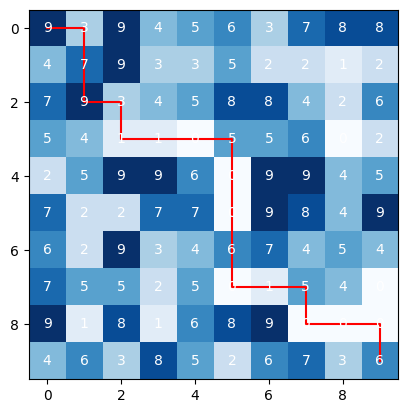

Total Algo1 : 47


In [13]:
# Call the heuristic function
total = heuristic(grid,show_plot=True)

# Print the path and total value
print("Total Algo1 :", total)

In [14]:
from queue import PriorityQueue

def dijkstra(grid, show_plot=False):
    num_rows, num_cols = grid.shape
    # Initialize the distance array with infinity for all positions except the starting point
    dist = np.full((num_rows, num_cols), np.inf)
    dist[0, 0] = 0

    # Initialize the previous position array with None for all positions except the starting point
    prev = np.empty((num_rows, num_cols), dtype=tuple)
    prev[0, 0] = None

    # Initialize the priority queue with the starting position and a distance of 0
    pq = PriorityQueue()
    pq.put((0, (0, 0)))

    # Keep looping until the queue is empty
    while not pq.empty():
        # Extract the position with the minimum distance from the queue
        _, (current_row, current_col) = pq.get()

        # Check if we have reached the end point
        if current_row == num_rows - 1 and current_col == num_cols - 1:
            break

        # Get the current distance and value
        current_dist = dist[current_row, current_col]
        current_value = grid[current_row, current_col]

        # Check if we are at the right edge of the grid
        if current_col < num_cols - 1:
            # Calculate the distance to the right position
            new_dist = current_dist + grid[current_row, current_col + 1]
            # Update the distance and previous position if the new distance is smaller
            if new_dist < dist[current_row, current_col + 1]:
                dist[current_row, current_col + 1] = new_dist
                prev[current_row, current_col + 1] = (current_row, current_col)
                # Add the right position to the queue with the updated distance as the key
                pq.put((new_dist, (current_row, current_col + 1)))

        # Check if we are at the bottom edge of the grid
        if current_row < num_rows - 1:
            # Calculate the distance to the below position
            new_dist = current_dist + grid[current_row + 1, current_col]
            # Update the distance and previous position if the new distance is smaller
            if new_dist < dist[current_row + 1, current_col]:
                dist[current_row + 1, current_col] = new_dist
                prev[current_row + 1, current_col] = (current_row, current_col)
                # Add the below position to the queue with the updated distance as the key
                pq.put((new_dist, (current_row + 1, current_col)))

    # Reconstruct the shortest path from the starting point to the end point by following the prev pointers
    path = []
    current_pos = (num_rows - 1, num_cols - 1)
    while current_pos is not None:
        path.append(current_pos)
        current_pos = prev[current_pos]

    # Reverse the path to start from the starting point
    path = path[::-1]

    # Convert the path to a NumPy array
    path = np.array(path)
    
    if show_plot:
        # Display the grid using Matplotlib
        plt.imshow(grid, cmap='Blues')

        # Highlight the path in red
        plt.plot(path[:, 1], path[:, 0], 'r-')

        # Add the grid numbers to the plot
        for i in range(num_rows):
            for j in range(num_cols):
                plt.text(j, i, grid[i, j], ha="center", va="center", color="w")


        # Show the plot
        plt.show()

    return dist[num_rows - 1, num_cols - 1]


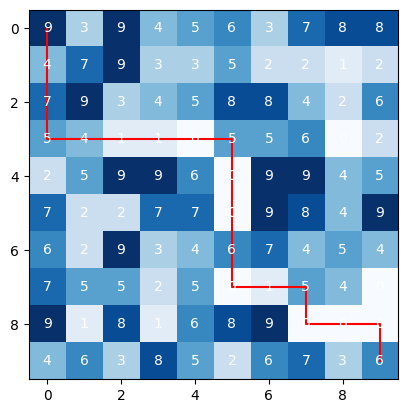

TotalAlgo2: 45.0


In [15]:
# Call the dijkstra function
min_distance= dijkstra(grid,show_plot=True)

# Print the path and total value
print("TotalAlgo2:", min_distance)

In [16]:
import timeit

# Define the range of grid sizes to test
grid_sizes = range(5, 20)

# Define the distribution from which cell numbers are generated
distribution = np.random.randint

# Initialize lists to store the results
heuristic_results = []
dijkstra_results = []

# Loop over the grid sizes
for grid_size in grid_sizes:
  # Generate a grid with random cell numbers
  grid = distribution(0, 10, size=(grid_size, grid_size))

  # Calculate the length and time of the shortest path using heuristic
  length = heuristic(grid)
  heuristic_time = timeit.timeit(lambda: heuristic(grid), number=1)
  heuristic_results.append((length, heuristic_time))

  # Calculate the length and time of the shortest path using dijkstra
  length = dijkstra(grid)
  dijkstra_time = timeit.timeit(lambda: dijkstra(grid), number=1)
  dijkstra_results.append((length, dijkstra_time))

In [17]:
print(heuristic_results)
print(dijkstra_results)

[(43, 2.250000000003638e-05), (37, 2.3199999986900366e-05), (33, 2.4499999994986865e-05), (60, 2.6200000036169513e-05), (48, 2.8900000017983984e-05), (56, 3.139999995482867e-05), (69, 3.490000000283544e-05), (52, 3.850000001648368e-05), (68, 4.1199999998298154e-05), (63, 4.190000004200556e-05), (92, 4.0399999988949276e-05), (92, 0.00017180000003236273), (101, 4.3900000036956044e-05), (120, 4.819999998062485e-05), (124, 4.780000000437212e-05)]
[(37.0, 0.0001519999999572974), (23.0, 0.00020100000000411455), (33.0, 0.00027760000000398577), (40.0, 0.000349699999958375), (48.0, 0.00045089999997571795), (45.0, 0.0005153000000177599), (54.0, 0.0006679999999619213), (45.0, 0.0006690999999818814), (48.0, 0.0008804000000282031), (58.0, 0.0010056000000417953), (82.0, 0.0011934999999994034), (75.0, 0.0014896000000135246), (64.0, 0.0013943000000153916), (79.0, 0.0015934999999558386), (79.0, 0.0018258000000059837)]


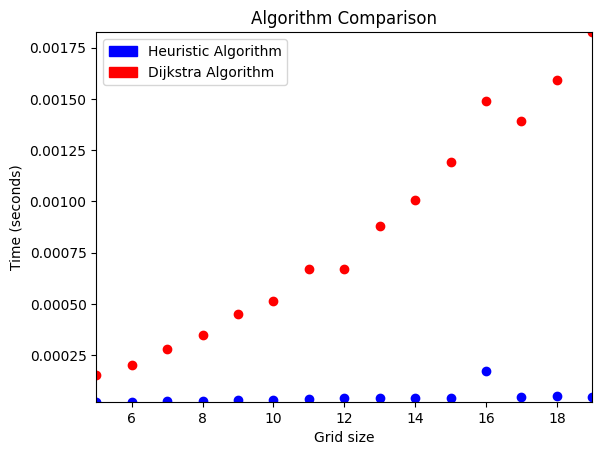

In [18]:
# Extract the length and time values from the algorithm1_results list
heuristic_lengths, heuristic_times = zip(*heuristic_results)

# Extract the length and time values from the dijkstra_results list
dijkstra_lengths, dijkstra_times = zip(*dijkstra_results)

# Create a scatter plot of the results for algorithm1
plt.scatter(grid_sizes, heuristic_times, color='blue')

# Create a scatter plot of the results for dijkstra
plt.scatter(grid_sizes, dijkstra_times, color='red')

# Set the x-axis limits to the range of grid sizes
plt.xlim((min(grid_sizes), max(grid_sizes)))

# Set the y-axis limits to the range of time values
plt.ylim((min(heuristic_times + dijkstra_times), max(heuristic_times + dijkstra_times)))

# Add a title and labels to the plot
plt.title("Algorithm Comparison")
plt.xlabel("Grid size")
plt.ylabel("Time (seconds)")
plt.legend(handles=[
    mpatches.Patch(color='blue', label='Heuristic Algorithm'),
    mpatches.Patch(color='red', label='Dijkstra Algorithm')
])


# Show the plot
plt.show()


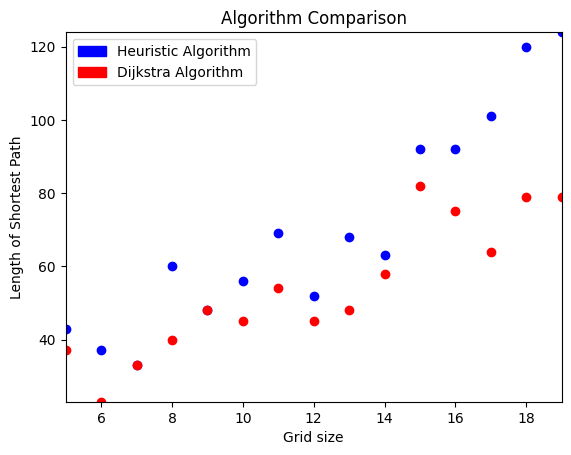

In [20]:
# Extract the length and time values from the heuristic_results list
heuristic_lengths, heuristic_times = zip(*heuristic_results)

# Extract the length and time values from the dijkstra_results list
dijkstra_lengths, dijkstra_times = zip(*dijkstra_results)

# Create a scatter plot of the results for algorithm1
plt.scatter(grid_sizes, heuristic_lengths, color='blue')

# Create a scatter plot of the results for dijkstra
plt.scatter(grid_sizes, dijkstra_lengths, color='red')

# Set the x-axis limits to the range of grid sizes
plt.xlim((min(grid_sizes), max(grid_sizes)))

# Set the y-axis limits to the range of length values
plt.ylim((min(heuristic_lengths + dijkstra_lengths), max(heuristic_lengths + dijkstra_lengths)))

# Add a title and labels to the plot
plt.title("Algorithm Comparison")
plt.xlabel("Grid size")
plt.ylabel("Length of Shortest Path")
plt.legend(handles=[
    mpatches.Patch(color='blue', label='Heuristic Algorithm'),
    mpatches.Patch(color='red', label='Dijkstra Algorithm')
])


# Show the plot
plt.show()
